### Neural Network Modelling

### Import relevant libraries and datasets

In [132]:
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

from imblearn.over_sampling import RandomOverSampler, SMOTE

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from joblib import dump, load

In [2]:
df = pd.read_csv('weatherAUS_imputed.csv')
display(df.head())
df.shape

,Date,Location,Year,Month,RainToday,RainTomorrow,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindGustDir_angle,Latitude,Longitude,Cloud,Pressure,Temperature,Humidity,temp_fluctuation
0,2009-01-01,Cobar,2009,1,0.0,0.0,-0.254034,1.452543,1.231645,0.544048,0.367568,-0.016581,0.134517,-0.346762,-1.566909,1.483789,-2.239319,1.266185
1,2009-01-02,Cobar,2009,1,0.0,0.0,-0.254034,2.092290,1.417426,-0.274399,0.142577,-0.016581,0.134517,-1.337620,-0.534263,0.523016,-2.103988,-0.123978
2,2009-01-03,Cobar,2009,1,0.0,0.0,-0.254034,1.589632,1.497046,-0.795229,-0.307405,-0.016581,0.134517,-1.337620,-0.664246,1.892307,-2.753579,1.531952
3,2009-01-04,Cobar,2009,1,0.0,0.0,-0.254034,1.178365,0.780464,0.395239,-1.432358,-0.016581,0.134517,-0.346762,-0.787008,1.756134,-1.400263,1.450178
4,2009-01-05,Cobar,2009,1,0.0,0.0,-0.254034,1.315454,1.205105,-0.720824,1.267530,-0.016581,0.134517,-0.544934,-0.765344,1.839351,-1.535595,1.102637


(67725, 18)

### Neural Network Classification

### 1. Without any over oder undersampling

### 1.1 Baseline Neural Network

In [3]:
data = df.drop(columns=['RainTomorrow', 'Location', 'Date'])
target = df['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42, stratify=target)

In [4]:
baseline_model = Sequential()
baseline_model.add(Dense(1, input_dim=X_train.shape[1], activation='sigmoid'))
baseline_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 16        
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


2024-04-16 13:39:53.082967: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [5]:
training_history1 = baseline_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=100)

Epoch 1/20
542/542 [==============================] - 1s 2ms/step - loss: 2.7405 - accuracy: 0.7856 - val_loss: 0.3943 - val_accuracy: 0.8257
Epoch 2/20
542/542 [==============================] - 1s 1ms/step - loss: 0.3863 - accuracy: 0.8276 - val_loss: 0.3727 - val_accuracy: 0.8317
Epoch 3/20
542/542 [==============================] - 1s 1ms/step - loss: 0.3691 - accuracy: 0.8359 - val_loss: 0.3491 - val_accuracy: 0.8465
Epoch 4/20
542/542 [==============================] - 1s 2ms/step - loss: 0.3630 - accuracy: 0.8383 - val_loss: 0.3452 - val_accuracy: 0.8472
Epoch 5/20
542/542 [==============================] - 1s 1ms/step - loss: 0.3592 - accuracy: 0.8400 - val_loss: 0.3467 - val_accuracy: 0.8478
Epoch 6/20
542/542 [==============================] - 1s 1ms/step - loss: 0.3577 - accuracy: 0.8407 - val_loss: 0.3522 - val_accuracy: 0.8464
Epoch 7/20
542/542 [==============================] - 1s 1ms/step - loss: 0.3534 - accuracy: 0.8432 - val_loss: 0.3439 - val_accuracy: 0.8504
Epoch 

In [6]:
acc1 = training_history1.history['accuracy']
val1 = training_history1.history['val_accuracy']
epochs = range(1, len(acc1) + 1)

[]

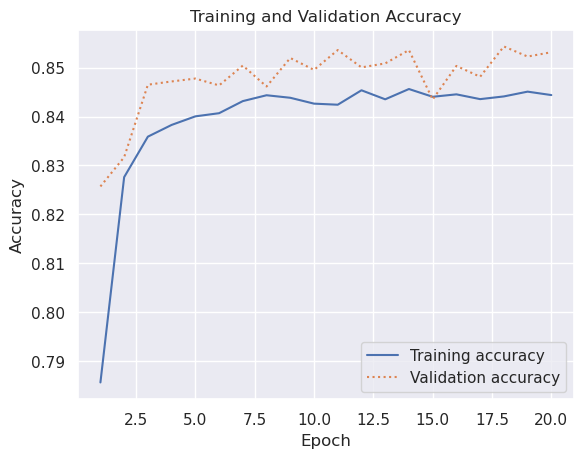

In [7]:
plt.plot(epochs, acc1, '-', label='Training accuracy')
plt.plot(epochs, val1, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

424/424 [==============================] - 0s 551us/step


Text(109.44999999999997, 0.5, 'Actual label')

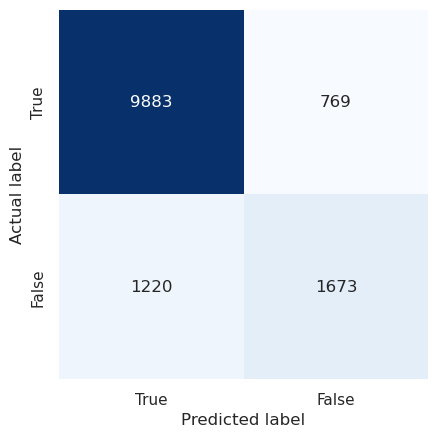

In [8]:
y_pred_prob1 = baseline_model.predict(X_test) > 0.5
y_pred1 = (y_pred_prob1 > 0.5).astype(int)
mat = confusion_matrix(y_test, y_pred1)
labels = ['True', 'False']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [9]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91     10652
         1.0       0.69      0.58      0.63      2893

    accuracy                           0.85     13545
   macro avg       0.79      0.75      0.77     13545
weighted avg       0.85      0.85      0.85     13545



### 1.2 Adding more layers 

In [10]:
model2 = Sequential()
model2.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 32)                512       
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


In [11]:
training_history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=100)

Epoch 1/20
542/542 [==============================] - 2s 3ms/step - loss: 2.3705 - accuracy: 0.7746 - val_loss: 0.3526 - val_accuracy: 0.8450
Epoch 2/20
542/542 [==============================] - 1s 3ms/step - loss: 0.5634 - accuracy: 0.7962 - val_loss: 0.9109 - val_accuracy: 0.6320
Epoch 3/20
542/542 [==============================] - 2s 3ms/step - loss: 0.5165 - accuracy: 0.8097 - val_loss: 0.3611 - val_accuracy: 0.8447
Epoch 4/20
542/542 [==============================] - 2s 3ms/step - loss: 0.5730 - accuracy: 0.8018 - val_loss: 0.4708 - val_accuracy: 0.7947
Epoch 5/20
542/542 [==============================] - 2s 3ms/step - loss: 0.5462 - accuracy: 0.8048 - val_loss: 0.5385 - val_accuracy: 0.8233
Epoch 6/20
542/542 [==============================] - 2s 3ms/step - loss: 0.4923 - accuracy: 0.8102 - val_loss: 0.7168 - val_accuracy: 0.8032
Epoch 7/20
542/542 [==============================] - 2s 3ms/step - loss: 0.5850 - accuracy: 0.8000 - val_loss: 0.3731 - val_accuracy: 0.8463
Epoch 

In [12]:
acc2 = training_history2.history['accuracy']
val2 = training_history2.history['val_accuracy']
epochs = range(1, len(acc2) + 1)

[]

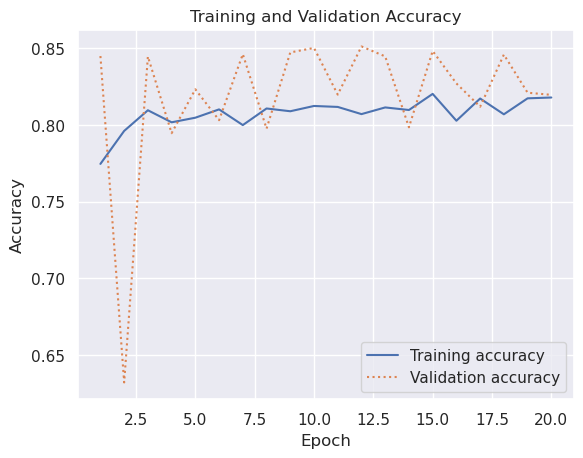

In [13]:
plt.plot(epochs, acc2, '-', label='Training accuracy')
plt.plot(epochs, val2, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

424/424 [==============================] - 1s 2ms/step


Text(109.44999999999997, 0.5, 'Actual label')

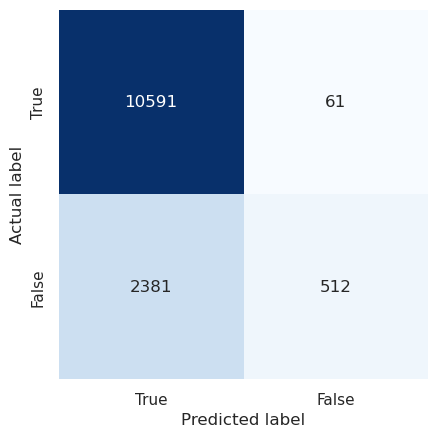

In [14]:
y_pred_prob2 = model2.predict(X_test) > 0.5
y_pred2 = (y_pred_prob2 > 0.5).astype(int)
mat = confusion_matrix(y_test, y_pred2)
labels = ['True', 'False']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [15]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

         0.0       0.82      0.99      0.90     10652
         1.0       0.89      0.18      0.30      2893

    accuracy                           0.82     13545
   macro avg       0.85      0.59      0.60     13545
weighted avg       0.83      0.82      0.77     13545



### 1.3 GridSearch

In [16]:
def build_classifier(learn_rate):
    # Initialising the DNN
    classifier = Sequential()
    classifier.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
    classifier.add(Dense(32, activation='relu'))
    classifier.add(Dense(1, activation='sigmoid'))
    opt = Adam(learning_rate=learn_rate)
    classifier.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return classifier


In [ ]:
"""
classifier = KerasClassifier(build_fn = build_classifier)
print(classifier.get_params().keys())
# grid search epochs, batch size and optimizer
epochs = [10]
batches = [100]
lr=[0.1,0.01, 0.001]
param_grid = dict(epochs=epochs, batch_size=batches, learn_rate=lr)
grid = GridSearchCV(estimator=classifier, param_grid=param_grid)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
"""

In [ ]:
"""
dump(grid_result.best_params_, 'grid_dnn.joblib')
"""

In [21]:
grid_dnn = load('grid_dnn.joblib')

In [23]:
grid_dnn

{'batch_size': 100, 'epochs': 10, 'learn_rate': 0.01}

### 1.4 Model with best parameters

In [24]:
model_best = build_classifier(0.01)

In [25]:
training_history_best = model_best.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, batch_size=200)

Epoch 1/300
271/271 [==============================] - 1s 4ms/step - loss: 3.1402 - accuracy: 0.7649 - val_loss: 0.3666 - val_accuracy: 0.8415
Epoch 2/300
271/271 [==============================] - 1s 3ms/step - loss: 0.5955 - accuracy: 0.8065 - val_loss: 0.4408 - val_accuracy: 0.7957
Epoch 3/300
271/271 [==============================] - 1s 4ms/step - loss: 0.6057 - accuracy: 0.7933 - val_loss: 0.3783 - val_accuracy: 0.8484
Epoch 4/300
271/271 [==============================] - 1s 3ms/step - loss: 0.4159 - accuracy: 0.8252 - val_loss: 0.3376 - val_accuracy: 0.8529
Epoch 5/300
271/271 [==============================] - 1s 4ms/step - loss: 0.3823 - accuracy: 0.8324 - val_loss: 0.3365 - val_accuracy: 0.8536
Epoch 6/300
271/271 [==============================] - 1s 5ms/step - loss: 0.3926 - accuracy: 0.8303 - val_loss: 0.3421 - val_accuracy: 0.8523
Epoch 7/300
271/271 [==============================] - 1s 4ms/step - loss: 0.3853 - accuracy: 0.8328 - val_loss: 0.3454 - val_accuracy: 0.8495

Epoch 58/300
271/271 [==============================] - 1s 5ms/step - loss: 0.3488 - accuracy: 0.8447 - val_loss: 0.3362 - val_accuracy: 0.8561
Epoch 59/300
271/271 [==============================] - 1s 4ms/step - loss: 0.3440 - accuracy: 0.8462 - val_loss: 0.3373 - val_accuracy: 0.8546
Epoch 60/300
271/271 [==============================] - 1s 4ms/step - loss: 0.3452 - accuracy: 0.8474 - val_loss: 0.3354 - val_accuracy: 0.8557
Epoch 61/300
271/271 [==============================] - 1s 4ms/step - loss: 0.3460 - accuracy: 0.8457 - val_loss: 0.3434 - val_accuracy: 0.8510
Epoch 62/300
271/271 [==============================] - 1s 4ms/step - loss: 0.3464 - accuracy: 0.8451 - val_loss: 0.3458 - val_accuracy: 0.8483
Epoch 63/300
271/271 [==============================] - 1s 4ms/step - loss: 0.3469 - accuracy: 0.8466 - val_loss: 0.3467 - val_accuracy: 0.8507
Epoch 64/300
271/271 [==============================] - 1s 5ms/step - loss: 0.3444 - accuracy: 0.8466 - val_loss: 0.3390 - val_accuracy:

Epoch 115/300
271/271 [==============================] - 3s 10ms/step - loss: 0.3420 - accuracy: 0.8482 - val_loss: 0.3392 - val_accuracy: 0.8529
Epoch 116/300
271/271 [==============================] - 3s 9ms/step - loss: 0.3419 - accuracy: 0.8485 - val_loss: 0.3372 - val_accuracy: 0.8520
Epoch 117/300
271/271 [==============================] - 3s 10ms/step - loss: 0.3457 - accuracy: 0.8468 - val_loss: 0.3330 - val_accuracy: 0.8558
Epoch 118/300
271/271 [==============================] - 3s 10ms/step - loss: 0.3443 - accuracy: 0.8475 - val_loss: 0.3337 - val_accuracy: 0.8555
Epoch 119/300
271/271 [==============================] - 3s 11ms/step - loss: 0.3427 - accuracy: 0.8485 - val_loss: 0.3355 - val_accuracy: 0.8570
Epoch 120/300
271/271 [==============================] - 3s 12ms/step - loss: 0.3428 - accuracy: 0.8490 - val_loss: 0.3402 - val_accuracy: 0.8466
Epoch 121/300
271/271 [==============================] - 3s 11ms/step - loss: 0.3430 - accuracy: 0.8488 - val_loss: 0.3397 - 

271/271 [==============================] - 1s 4ms/step - loss: 0.3428 - accuracy: 0.8490 - val_loss: 0.3326 - val_accuracy: 0.8563
Epoch 172/300
271/271 [==============================] - 1s 4ms/step - loss: 0.3399 - accuracy: 0.8500 - val_loss: 0.3342 - val_accuracy: 0.8550
Epoch 173/300
271/271 [==============================] - 1s 4ms/step - loss: 0.3406 - accuracy: 0.8499 - val_loss: 0.3329 - val_accuracy: 0.8560
Epoch 174/300
271/271 [==============================] - 2s 6ms/step - loss: 0.3420 - accuracy: 0.8498 - val_loss: 0.3355 - val_accuracy: 0.8553
Epoch 175/300
271/271 [==============================] - 2s 6ms/step - loss: 0.3431 - accuracy: 0.8493 - val_loss: 0.3320 - val_accuracy: 0.8574
Epoch 176/300
271/271 [==============================] - 1s 5ms/step - loss: 0.3402 - accuracy: 0.8488 - val_loss: 0.3349 - val_accuracy: 0.8531
Epoch 177/300
271/271 [==============================] - 2s 6ms/step - loss: 0.3418 - accuracy: 0.8485 - val_loss: 0.3365 - val_accuracy: 0.8551

271/271 [==============================] - 2s 7ms/step - loss: 0.3400 - accuracy: 0.8498 - val_loss: 0.3376 - val_accuracy: 0.8506
Epoch 228/300
271/271 [==============================] - 1s 5ms/step - loss: 0.3413 - accuracy: 0.8496 - val_loss: 0.3419 - val_accuracy: 0.8520
Epoch 229/300
271/271 [==============================] - 2s 6ms/step - loss: 0.3424 - accuracy: 0.8492 - val_loss: 0.3395 - val_accuracy: 0.8546
Epoch 230/300
271/271 [==============================] - 1s 5ms/step - loss: 0.3399 - accuracy: 0.8493 - val_loss: 0.3350 - val_accuracy: 0.8546
Epoch 231/300
271/271 [==============================] - 1s 4ms/step - loss: 0.3401 - accuracy: 0.8504 - val_loss: 0.3375 - val_accuracy: 0.8503
Epoch 232/300
271/271 [==============================] - 1s 4ms/step - loss: 0.3404 - accuracy: 0.8492 - val_loss: 0.3331 - val_accuracy: 0.8554
Epoch 233/300
271/271 [==============================] - 1s 5ms/step - loss: 0.3400 - accuracy: 0.8493 - val_loss: 0.3416 - val_accuracy: 0.8514

271/271 [==============================] - 1s 4ms/step - loss: 0.3396 - accuracy: 0.8496 - val_loss: 0.3334 - val_accuracy: 0.8557
Epoch 284/300
271/271 [==============================] - 2s 6ms/step - loss: 0.3395 - accuracy: 0.8502 - val_loss: 0.3359 - val_accuracy: 0.8543
Epoch 285/300
271/271 [==============================] - 2s 5ms/step - loss: 0.3407 - accuracy: 0.8491 - val_loss: 0.3380 - val_accuracy: 0.8568
Epoch 286/300
271/271 [==============================] - 2s 7ms/step - loss: 0.3413 - accuracy: 0.8487 - val_loss: 0.3406 - val_accuracy: 0.8480
Epoch 287/300
271/271 [==============================] - 2s 7ms/step - loss: 0.3411 - accuracy: 0.8501 - val_loss: 0.3348 - val_accuracy: 0.8577
Epoch 288/300
271/271 [==============================] - 1s 3ms/step - loss: 0.3410 - accuracy: 0.8489 - val_loss: 0.3312 - val_accuracy: 0.8574
Epoch 289/300
271/271 [==============================] - 1s 4ms/step - loss: 0.3421 - accuracy: 0.8496 - val_loss: 0.3357 - val_accuracy: 0.8580

In [26]:
acc_best = training_history_best.history['accuracy']
val_best = training_history_best.history['val_accuracy']
epochs = range(1, len(acc_best) + 1)

[]

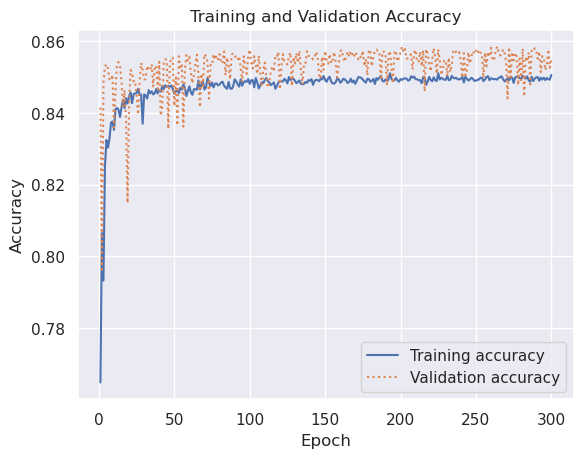

In [27]:
plt.plot(epochs, acc_best, '-', label='Training accuracy')
plt.plot(epochs, val_best, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

424/424 [==============================] - 0s 645us/step


Text(109.44999999999997, 0.5, 'Actual label')

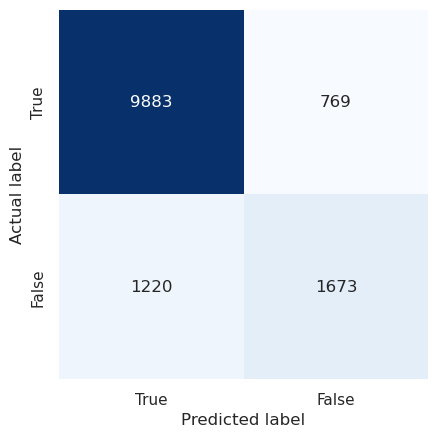

In [28]:
y_pred_prob_best = baseline_model.predict(X_test) > 0.5
y_pred_best = (y_pred_prob_best > 0.5).astype(int)
mat = confusion_matrix(y_test, y_pred_best)
labels = ['True', 'False']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [29]:
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91     10652
         1.0       0.69      0.58      0.63      2893

    accuracy                           0.85     13545
   macro avg       0.79      0.75      0.77     13545
weighted avg       0.85      0.85      0.85     13545



The models we got so far seem quite unstable so far. This is certainly due the stochastic nature of the model, i.e stochastic gradient descent introduced randomness through mini-batch sampling which can cause the optimization process to converge to different local minima. This seems to be the case four our models. 

Let's see a) if random oversampling and b) adding more layers solves part of the problem. 

### 2. Random Oversampling with Dropout

In [96]:
ros = RandomOverSampler()
sample_ros = ros.fit_resample(data,target)

In [97]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(sample_ros[0], sample_ros[1], test_size=0.2, random_state=20)

In [98]:
model_ros = Sequential()
model_ros.add(Dropout(0.25))
model_ros.add(Dense(128, input_dim=X_train_ros.shape[1], activation='relu'))
model_ros.add(Dropout(0.25))
model_ros.add(Dense(128, activation='relu'))
model_ros.add(Dropout(0.25))
model_ros.add(Dense(64, activation='relu'))
model_ros.add(Dropout(0.25))
model_ros.add(Dense(64, activation='relu'))
model_ros.add(Dropout(0.25))
model_ros.add(Dense(32, activation='relu'))
model_ros.add(Dropout(0.25))
model_ros.add(Dense(1, activation='sigmoid'))
opt = Adam(learning_rate=0.001)
model_ros.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [99]:
training_history_ros = model_ros.fit(X_train_ros, y_train_ros, validation_data=(X_test_ros, y_test_ros), epochs=100, 
                                 batch_size=200)

Epoch 1/100
427/427 [==============================] - 6s 12ms/step - loss: 2.3239 - accuracy: 0.5351 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/100
427/427 [==============================] - 5s 11ms/step - loss: 0.6730 - accuracy: 0.5621 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/100
427/427 [==============================] - 5s 11ms/step - loss: 0.6573 - accuracy: 0.5647 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/100
427/427 [==============================] - 5s 11ms/step - loss: 0.6516 - accuracy: 0.5646 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/100
427/427 [==============================] - 6s 13ms/step - loss: 0.6479 - accuracy: 0.5654 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/100
427/427 [==============================] - 5s 12ms/step - loss: 0.6482 - accuracy: 0.5654 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/100
427/427 [==============================] - 5s 11ms/step - loss: 0.6459 - accuracy: 0.5667 - val_loss: 0.6932 - val_accuracy:

427/427 [==============================] - 4s 10ms/step - loss: 0.6377 - accuracy: 0.5692 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 58/100
427/427 [==============================] - 5s 13ms/step - loss: 0.6366 - accuracy: 0.5666 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 59/100
427/427 [==============================] - 5s 12ms/step - loss: 0.6362 - accuracy: 0.5711 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 60/100
427/427 [==============================] - 5s 11ms/step - loss: 0.6372 - accuracy: 0.5697 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 61/100
427/427 [==============================] - 5s 11ms/step - loss: 0.6366 - accuracy: 0.5709 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 62/100
427/427 [==============================] - 5s 12ms/step - loss: 0.6361 - accuracy: 0.5688 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 63/100
427/427 [==============================] - 5s 11ms/step - loss: 0.6384 - accuracy: 0.5686 - val_loss: 0.6932 - val_accuracy: 0.500

In [100]:
acc_ros = training_history_ros.history['accuracy']
val_ros = training_history_ros.history['val_accuracy']
epochs = range(1, len(acc_ros) + 1)

[]

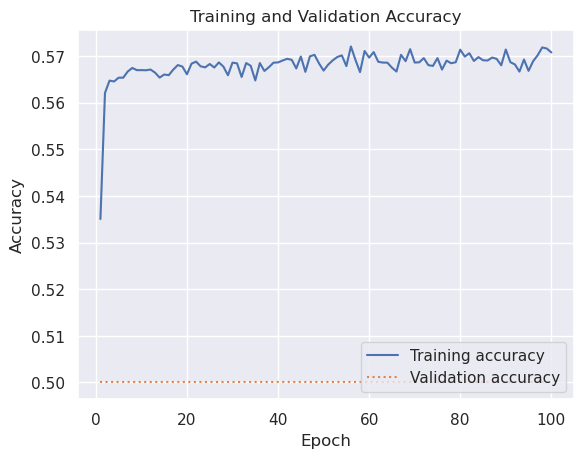

In [101]:
plt.plot(epochs, acc_ros, '-', label='Training accuracy')
plt.plot(epochs, val_ros, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

666/666 [==============================] - 2s 3ms/step


Text(109.44999999999997, 0.5, 'Actual label')

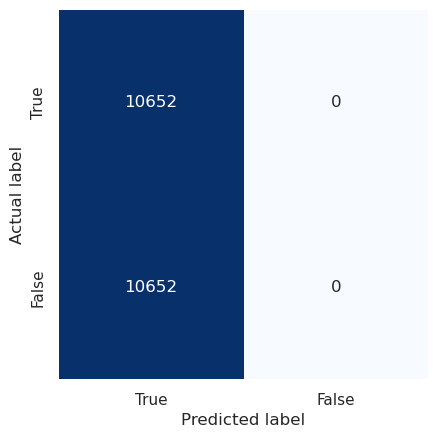

In [102]:
y_pred_prob_ros = model_ros.predict(X_test_ros) > 0.5
y_pred_ros = (y_pred_prob_ros > 0.5).astype(int)
mat = confusion_matrix(y_test_ros, y_pred_ros)
labels = ['True', 'False']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [103]:
print(classification_report(y_test_ros, y_pred_ros))

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67     10652
         1.0       0.00      0.00      0.00     10652

    accuracy                           0.50     21304
   macro avg       0.25      0.50      0.33     21304
weighted avg       0.25      0.50      0.33     21304



/home/claudia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/claudia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/claudia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3. Adding more layers to the model with Dropout

In [91]:
model4 = Sequential()
model4.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model_ros.add(Dropout(0.25))
model4.add(Dense(128, activation='relu'))
model_ros.add(Dropout(0.25))
model4.add(Dense(128, activation='relu'))
model_ros.add(Dropout(0.25))
model4.add(Dense(64, activation='relu'))
model_ros.add(Dropout(0.25))
model4.add(Dense(64, activation='relu'))
model_ros.add(Dropout(0.25))
model4.add(Dense(32, activation='relu'))
model_ros.add(Dropout(0.25))
model4.add(Dense(1, activation='sigmoid'))
model_ros.add(Dropout(0.25))
opt = Adam(learning_rate=0.01)
model4.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model4.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 128)               2048      
                                                                 
 dense_62 (Dense)            (None, 128)               16512     
                                                                 
 dense_63 (Dense)            (None, 128)               16512     
                                                                 
 dense_64 (Dense)            (None, 64)                8256      
                                                                 
 dense_65 (Dense)            (None, 64)                4160      
                                                                 
 dense_66 (Dense)            (None, 32)                2080      
                                                                 
 dense_67 (Dense)            (None, 1)               

In [94]:
training_history4 = model4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=200)

Epoch 1/100
271/271 [==============================] - 3s 12ms/step - loss: 0.3424 - accuracy: 0.8496 - val_loss: 0.3320 - val_accuracy: 0.8559
Epoch 2/100
271/271 [==============================] - 3s 10ms/step - loss: 0.3410 - accuracy: 0.8500 - val_loss: 0.3321 - val_accuracy: 0.8551
Epoch 3/100
271/271 [==============================] - 2s 9ms/step - loss: 0.3394 - accuracy: 0.8484 - val_loss: 0.3370 - val_accuracy: 0.8532
Epoch 4/100
271/271 [==============================] - 3s 9ms/step - loss: 0.3397 - accuracy: 0.8493 - val_loss: 0.3331 - val_accuracy: 0.8566
Epoch 5/100
271/271 [==============================] - 3s 11ms/step - loss: 0.3412 - accuracy: 0.8491 - val_loss: 0.3348 - val_accuracy: 0.8560
Epoch 6/100
271/271 [==============================] - 2s 8ms/step - loss: 0.3398 - accuracy: 0.8489 - val_loss: 0.3396 - val_accuracy: 0.8566
Epoch 7/100
271/271 [==============================] - 3s 11ms/step - loss: 0.3403 - accuracy: 0.8498 - val_loss: 0.3339 - val_accuracy: 0.

Epoch 58/100
271/271 [==============================] - 2s 8ms/step - loss: 0.3409 - accuracy: 0.8487 - val_loss: 0.3321 - val_accuracy: 0.8561
Epoch 59/100
271/271 [==============================] - 2s 7ms/step - loss: 0.3389 - accuracy: 0.8501 - val_loss: 0.3310 - val_accuracy: 0.8563
Epoch 60/100
271/271 [==============================] - 2s 9ms/step - loss: 0.3408 - accuracy: 0.8492 - val_loss: 0.3341 - val_accuracy: 0.8491
Epoch 61/100
271/271 [==============================] - 3s 11ms/step - loss: 0.3417 - accuracy: 0.8485 - val_loss: 0.3316 - val_accuracy: 0.8561
Epoch 62/100
271/271 [==============================] - 3s 12ms/step - loss: 0.3421 - accuracy: 0.8488 - val_loss: 0.3407 - val_accuracy: 0.8559
Epoch 63/100
271/271 [==============================] - 3s 10ms/step - loss: 0.3391 - accuracy: 0.8488 - val_loss: 0.3348 - val_accuracy: 0.8554
Epoch 64/100
271/271 [==============================] - 3s 9ms/step - loss: 0.3392 - accuracy: 0.8491 - val_loss: 0.3309 - val_accura

[]

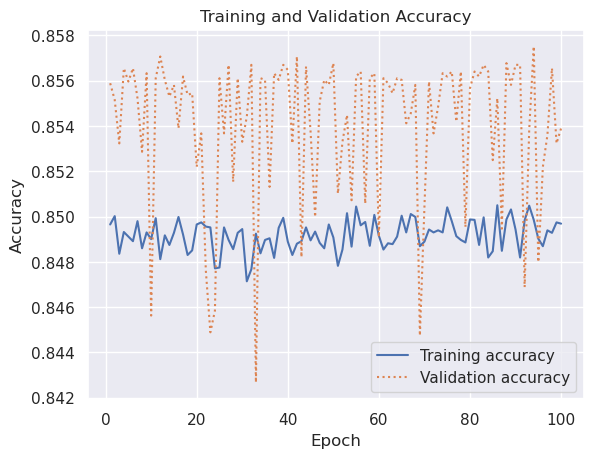

In [104]:
acc4 = training_history4.history['accuracy']
val4 = training_history4.history['val_accuracy']
epochs = range(1, len(acc4) + 1)

plt.plot(epochs, acc4, '-', label='Training accuracy')
plt.plot(epochs, val4, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

424/424 [==============================] - 1s 2ms/step


Text(109.44999999999997, 0.5, 'Actual label')

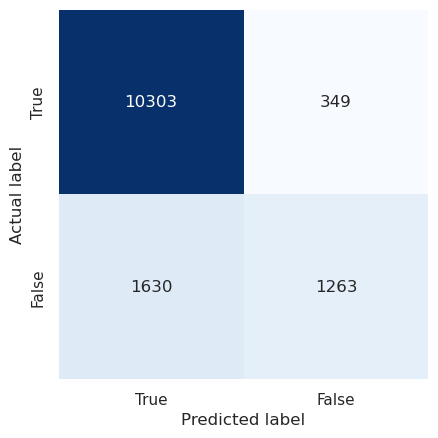

In [105]:
y_pred_prob4 = model4.predict(X_test) > 0.5
y_pred4 = (y_pred_prob4 > 0.5).astype(float)
mat = confusion_matrix(y_test, y_pred4)
labels = ['True', 'False']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [106]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     10652
         1.0       0.78      0.44      0.56      2893

    accuracy                           0.85     13545
   macro avg       0.82      0.70      0.74     13545
weighted avg       0.85      0.85      0.84     13545



### 4. Early Stopping and Batch Normalization

In [119]:
model5 = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),  # input layer
    BatchNormalization(),
    Dropout(0.25),  # dropout layer with 50% dropout rate
    Dense(32, activation='relu'),  # hidden layer
    BatchNormalization(),
    Dropout(0.25),  # dropout layer with 50% dropout rate
    Dense(1, activation='sigmoid')  # output layer with sigmoid activation for binary classification
])

# Compile the model
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model5.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 64)                1024      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout_62 (Dropout)        (None, 64)                0         
                                                                 
 dense_82 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dropout_63 (Dropout)        (None, 32)              

In [121]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)

In [122]:
training_history5 = model5.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
1355/1355 [==============================] - 6s 3ms/step - loss: 0.4235 - accuracy: 0.8097 - val_loss: 25.5376 - val_accuracy: 0.2121
Epoch 2/100
1355/1355 [==============================] - 6s 4ms/step - loss: 0.3636 - accuracy: 0.8374 - val_loss: 0.4732 - val_accuracy: 0.8097
Epoch 3/100
1355/1355 [==============================] - 5s 4ms/step - loss: 0.3564 - accuracy: 0.8416 - val_loss: 7.1465 - val_accuracy: 0.2121
Epoch 4/100
1355/1355 [==============================] - 5s 4ms/step - loss: 0.3562 - accuracy: 0.8403 - val_loss: 5.4090 - val_accuracy: 0.2121
Epoch 5/100
1355/1355 [==============================] - 6s 4ms/step - loss: 0.3541 - accuracy: 0.8422 - val_loss: 0.5145 - val_accuracy: 0.8252
Epoch 6/100
1355/1355 [==============================] - 5s 4ms/step - loss: 0.3526 - accuracy: 0.8411 - val_loss: 10.4178 - val_accuracy: 0.7879
Epoch 7/100
1355/1355 [==============================] - 6s 4ms/step - loss: 0.3543 - accuracy: 0.8429 - val_loss: 2.4818 - val_

[]

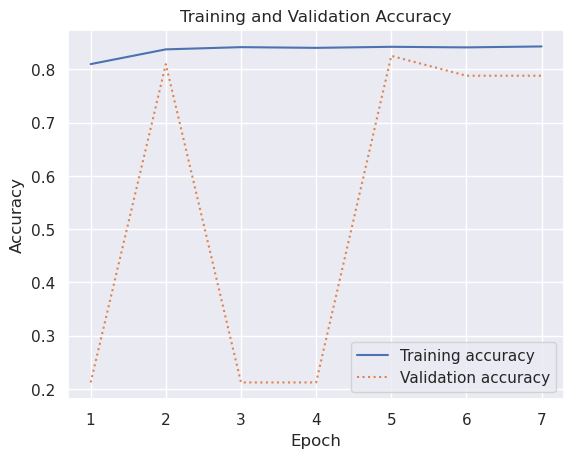

In [123]:
acc5 = training_history5.history['accuracy']
val5 = training_history5.history['val_accuracy']
epochs = range(1, len(acc5) + 1)

plt.plot(epochs, acc5, '-', label='Training accuracy')
plt.plot(epochs, val5, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

424/424 [==============================] - 1s 2ms/step


Text(109.44999999999997, 0.5, 'Actual label')

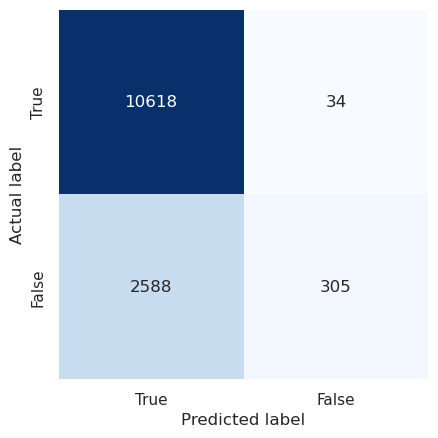

In [124]:
y_pred_prob5 = model5.predict(X_test) > 0.5
y_pred5 = (y_pred_prob5 > 0.5).astype(float)
mat = confusion_matrix(y_test, y_pred5)
labels = ['True', 'False']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [126]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89     10652
         1.0       0.90      0.11      0.19      2893

    accuracy                           0.81     13545
   macro avg       0.85      0.55      0.54     13545
weighted avg       0.82      0.81      0.74     13545



### 5. Learning Rate Scheduling

In [128]:
model6 = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),  # input layer
    Dropout(0.25),  # dropout layer with 50% dropout rate
    Dense(32, activation='relu'),  # hidden layer
    Dropout(0.25),  # dropout layer with 50% dropout rate
    Dense(1, activation='sigmoid')  # output layer with sigmoid activation for binary classification
])

In [129]:
def lr_schedule(epoch):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced by a factor of 0.1 after every 10 epochs.
    """
    learning_rate = 0.001
    if epoch > 10:
        learning_rate *= 0.1
    return learning_rate

In [130]:
# Compile the model
opt = Adam(learning_rate=0.001)
model6.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model6.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 64)                1024      
                                                                 
 dropout_64 (Dropout)        (None, 64)                0         
                                                                 
 dense_85 (Dense)            (None, 32)                2080      
                                                                 
 dropout_65 (Dropout)        (None, 32)                0         
                                                                 
 dense_86 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,137
Trainable params: 3,137
Non-trainable params: 0
_________________________________________________________________


In [136]:
# Define the learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model with learning rate scheduling
training_history6 = model6.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping,lr_scheduler])

Epoch 1/100
1355/1355 [==============================] - 6s 4ms/step - loss: 0.5214 - accuracy: 0.7860 - val_loss: 0.5167 - val_accuracy: 0.7879 - lr: 0.0010
Epoch 2/100
1355/1355 [==============================] - 7s 5ms/step - loss: 0.5196 - accuracy: 0.7860 - val_loss: 0.5167 - val_accuracy: 0.7879 - lr: 0.0010
Epoch 3/100
1355/1355 [==============================] - 6s 4ms/step - loss: 0.5197 - accuracy: 0.7860 - val_loss: 0.5167 - val_accuracy: 0.7879 - lr: 0.0010
Epoch 4/100
1355/1355 [==============================] - 5s 4ms/step - loss: 0.5196 - accuracy: 0.7860 - val_loss: 0.5167 - val_accuracy: 0.7879 - lr: 0.0010
Epoch 5/100
1355/1355 [==============================] - 4s 3ms/step - loss: 0.5195 - accuracy: 0.7860 - val_loss: 0.5167 - val_accuracy: 0.7879 - lr: 0.0010
Epoch 6/100
1355/1355 [==============================] - 4s 3ms/step - loss: 0.5196 - accuracy: 0.7860 - val_loss: 0.5167 - val_accuracy: 0.7879 - lr: 0.0010
Epoch 7/100
1355/1355 [=============================

[]

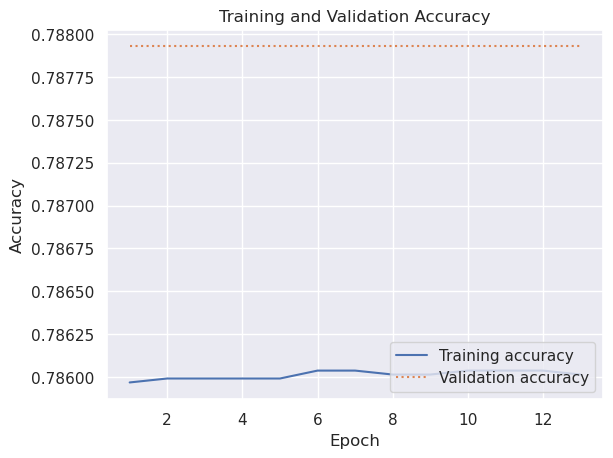

In [137]:
acc6 = training_history6.history['accuracy']
val6 = training_history6.history['val_accuracy']
epochs = range(1, len(acc6) + 1)

plt.plot(epochs, acc6, '-', label='Training accuracy')
plt.plot(epochs, val6, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

424/424 [==============================] - 1s 3ms/step


Text(109.44999999999997, 0.5, 'Actual label')

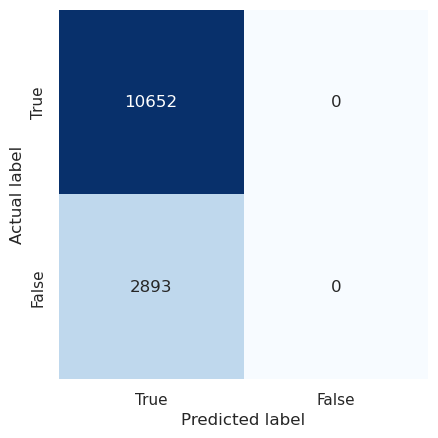

In [138]:
y_pred_prob6 = model6.predict(X_test) > 0.5
y_pred6 = (y_pred_prob6 > 0.5).astype(float)
mat = confusion_matrix(y_test, y_pred6)
labels = ['True', 'False']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [139]:
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88     10652
         1.0       0.00      0.00      0.00      2893

    accuracy                           0.79     13545
   macro avg       0.39      0.50      0.44     13545
weighted avg       0.62      0.79      0.69     13545



/home/claudia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/claudia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/claudia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 6. Conclusion

The Neural Network Model does not perform well. It is unstable and gives low precision and recall scores no matter the number of epoch or batch_size. Different learning rates also do no seem to give a better result, nor does increasing the number of layers. It seems that the Gradient Descent converges to different local minima, meaning that the function we are trying to minimize is not convex and the algorithm becomes unpredictable. 

Unfortunately, the gradient descent algorithm is one of the only algorithms that can be used in practice because it is the only efficient optimization algorithm given our computational capabilities.